In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

def loadData(path, folder):
  data = []
  labels = []
  path_folders = os.path.join(path, folder + '/')
  folder_files = os.listdir(path + folder)
  for folder_file in folder_files:
    path_images = os.path.join(path_folders, folder_file + '/')
    file_images = os.listdir(path_folders + folder_file)
    for file_image in file_images:
      img_path = os.path.join(path_images, file_image)
      image = load_img(img_path, target_size=(224, 224))
      image = img_to_array(image)
      image = preprocess_input(image)
      data.append(image)
      labels.append(folder_file)
  return data, labels

In [2]:
def normalizationLabels(data, labels, lb):
  labels = lb.fit_transform(labels)
  NUM_CLASSES = len(lb.classes_)
  # labels = to_categorical(labels)  # ??
  print(labels)
  # Lấy tên nhãn từ LabelBinarizer và chuyển về dạng list
  class_names = lb.classes_.tolist()
  # Tạo dictionary ánh xạ giữa tên nhãn và số chuyển đổi của nhãn
  labels_mapping = {class_names[i] : i for i in range(len(class_names))}

  data = np.array(data, dtype='float16')
  labels = np.array(labels)
  return data, labels, labels_mapping, NUM_CLASSES

In [3]:
lb = LabelBinarizer()
BS = 200

model = load_model('./my_model_dog_vgg.h5')

X_test, Y_test = loadData('./Dataspl/', 'Test')
X_test, Y_test, labels_mapping_test, NUM_CLASSES = normalizationLabels(X_test, Y_test, lb)

print("[INFO] network...")
pred = model.predict(X_test, batch_size=BS)

pred = np.argmax(pred, axis=1)

df_report = classification_report(Y_test.argmax(axis=1), pred, target_names=lb.classes_)

print(df_report)

c:\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[INFO] network...
14/14 ━━━━━━━━━━━━━━━━━━━━ 1700s 117s/step
                                  precision    recall  f1-score   support

                  Cat_Abyssinian       0.56      0.53      0.55        83
                      Cat_Birman       0.65      0.57      0.61        54
                      Cat_Bombay       0.68      0.77      0.72        56
           Cat_British_Shorthair       0.44      0.29      0.35        52
                  Cat_Maine_Coon       0.42      0.88      0.57        56
                     Cat_Persian       1.00      0.39      0.56        56
                Cat_Russian_Blue       0.53      0.38      0.44        56
                     Cat_Siamese       0.56      0.64      0.60        56
                      Cat_Sphynx       0.96      0.45      0.61        56
                      Cat_Tuxedo       0.95      0.70      0.80        56
    

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_matrix(Y_test, pred, lb):
  # Tính ma trận nhầm lẫn
  cm = confusion_matrix(Y_test.argmax(axis=1), pred)
  # Hiển thị ma trận nhầm lẫn bằng heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

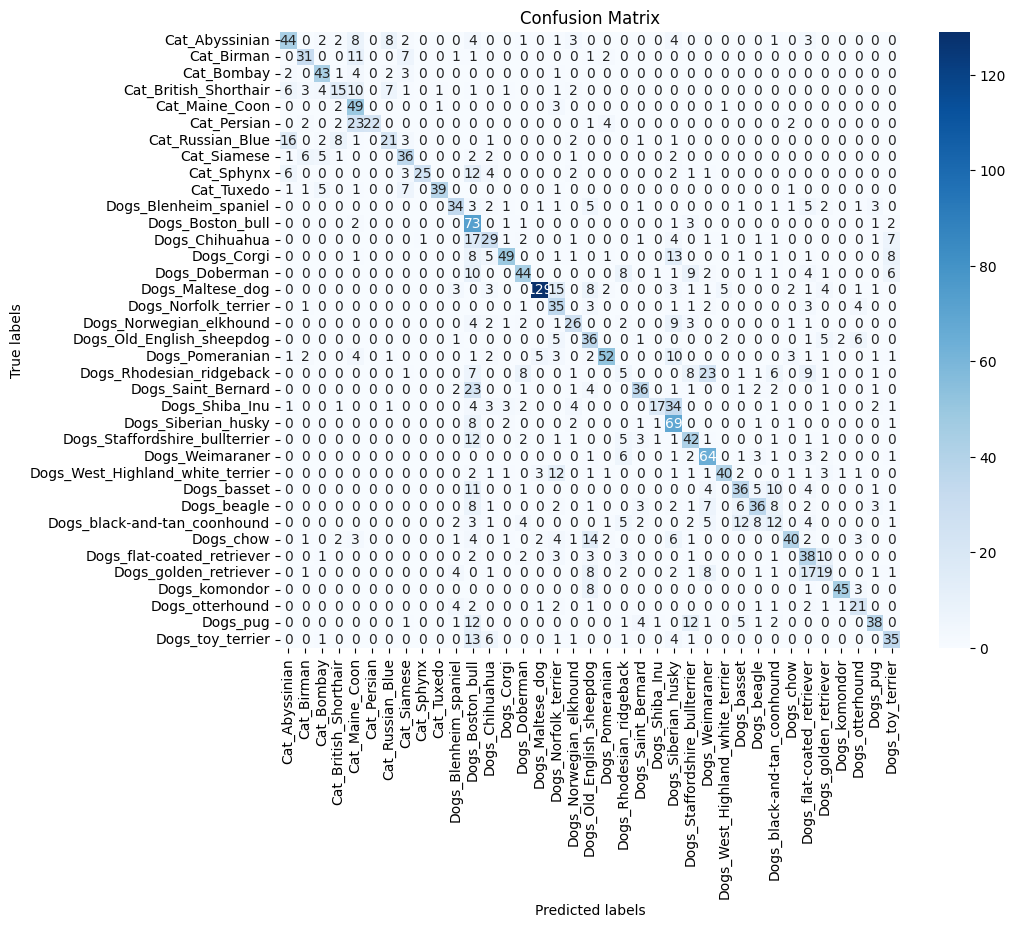

In [7]:
plot_matrix(Y_test, pred, lb)